<a href="https://colab.research.google.com/github/panpepson/ML-AI-pep/blob/master/DW-d4-cifar10_pep_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os

from tensorflow.python.keras.datasets import cifar10 # dane z liczbami  bylo mist
from tensorflow.python.keras.models import Sequential #warstwy 
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D # warstwy
from tensorflow.python.keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

In [3]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

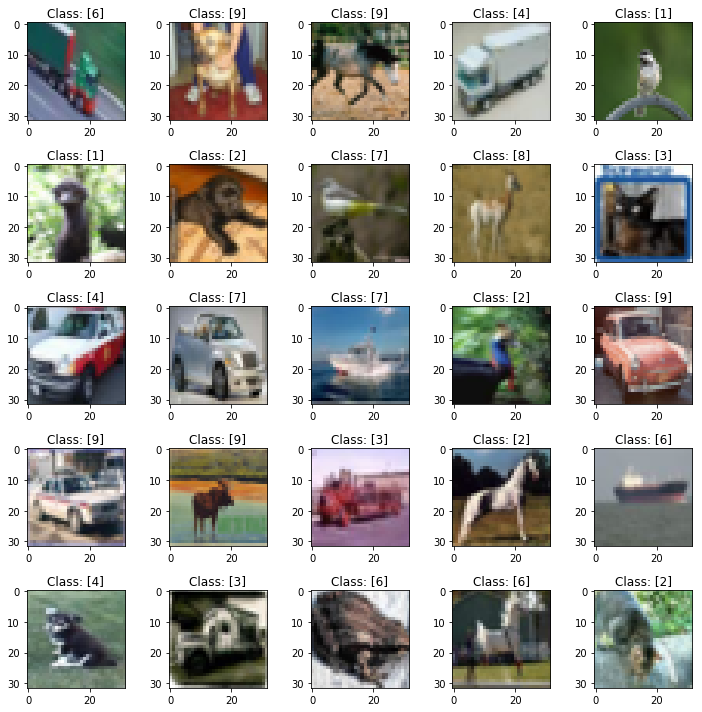

In [0]:
plt.figure(figsize=(10,10))
for idx in range(25): 
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx+50], cmap='gray') # +50] 50-1000 inne zbiory
    plt.title('Class: {}'.format(y_train[idx]))
plt.tight_layout() 

In [4]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

num_channels = 3 

X_train = X_train.reshape(-1, img_rows, img_cols, num_channels)
X_test = X_test.reshape(-1, img_rows, img_cols,  num_channels)

input_shape = (img_rows, img_cols, num_channels)
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
#normalizacja wartosci od 0 do 1 dzielac przez 255

if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255  

In [0]:
X_test.max()


1.0

In [0]:
#optymalizacja y dla poszczegolnych class 

if len(y_train.shape) == 2:
  y_train = y_train.reshape(-1)
  y_test = y_test.reshape(-1)
  
if len(y_train.shape) == 1: 
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
        

In [7]:
y_train.shape, y_test.shape, num_classes

((50000, 10), (10000, 10), 10)

In [0]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape), 
    Conv2D(32, kernel_size=(3,3), activation='relu'), 
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    
    Conv2D(64, kernel_size=(3,3), activation='relu'), 
    Conv2D(64, kernel_size=(3,3), activation='relu'), 
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    
    Conv2D(128, kernel_size=(3,3), activation='relu'), 
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    
    
    Flatten(), #przejscie do miedzy sieciami na plasko - mostek  
    
    Dense(1024,activation='relu'), 
    Dropout(0.25),
    Dense(num_classes, activation='softmax') #softmax zapewnie prawdopodobienstwo  
])
 # model.summary() # podsumowanie modelu 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
#model.summary()

In [0]:
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR'] #adres do tpu
tf.logging.set_verbosity(tf.logging.INFO)

In [13]:
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
model, 
strategy = tf.contrib.tpu.TPUDistributionStrategy(
tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

INFO:tensorflow:Querying Tensorflow master (grpc://10.60.183.218:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 2905553055566991916)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 4601212864399040149)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 3929353595216175334)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 14287263098270626711)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 4603926027571187611)
INFO:tensorflow:*** Available Device: _DeviceAttributes(

In [15]:
model.fit(
    X_train, y_train,
    batch_size = 256,
    epochs = 9, #tralowanie po sieci 3 max dla slabych maszyn
    verbose = 2,
    validation_data = (X_test, y_test)
)

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/9
 - 25s - loss: 1.8942 - acc: 0.2826 - val_loss: 1.6487 - val_acc: 0.3932
Epoch 2/9
 - 26s - loss: 1.5134 - acc: 0.4429 - val_loss: 1.3914 - val_acc: 0.4919
Epoch 3/9
 - 21s - loss: 1.3590 - acc: 0.5080 - val_loss: 1.2342 - val_acc: 0.5598
Epoch 4/9
 - 19s - loss: 1.2394 - acc: 0.5517 - val_loss: 1.1429 - val_acc: 0.5937
Epoch 5/9
 - 17s - loss: 1.1474 - acc: 0.5912 - val_loss: 1.0606 - val_acc: 0.6309
Epoch 6/9
 - 18s - loss: 1.0827 - acc: 0.6169 - val_loss: 1.0278 - val_acc: 0.6395
Epoch 7/9
 - 18s - loss: 1.0263 - acc: 0.6369 - val_loss: 0.9487 - val_acc: 0.6742
Epoch 8/9
 - 18s - loss: 0.9804 - acc: 0.6548 - val_loss: 0.9244 - val_acc: 0.6745
Epoch 9/9
 - 19s - loss: 0.9434 - acc: 0.6656 - val_loss: 0.8853 - val_acc: 0.6902


In [0]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 154us/step


[0.9129737392425538, 0.6807]